## Introduction to Machine Learning 
### Mohammad Maghsoudimehrabani - University of Guelph
### mmaghsou [at] uoguelph.ca
#### Third Dataset Example

##### Fall 2023


In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

sns.set_style('darkgrid')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams['figure.figsize'] = (20.0, 10.0) #(10.0, 8.0)

In [3]:
# This is a description of the Assign3-Classification dataset

# Total Number of Records: 12200
# Total Number of Features: 46
# Label: "Routability" Binary 1: Routable, 0: Unroutable

# Feature       Name                       Meaning
# -------       -------------------        ---------------------------------------
# 1             Pin0 (Pin Dens) Hist       ... Pin Density 0
# 2             Pin25 (Pin Dens) Hist      ... Pin Density 25
# 3             Pin50 (Pin Dens) Hist      ... Pin Denisty 50
# 4             Pin75 (Pin Dens) Hist      ... Pin Density 75
# 5             Pin100 (Pin Dens) Hist     ... Pin Density 100
# 6             Mean WLPA                  ... Wirelength per Area
# 7             STDEV WLPA                 ... Wirelength per Area
# 8             Mean Pin Density           ... The mean pin density in the placement
# 9             STDEV Pin Density          ... The std pin density in the placement
# 10            Mean NCPR5                 ... Mean: Nets Cut Per Region using 5x5 window
# 11            STDEV NCPR5                ... Stdev: Nets Cut Per Region using 5x5 window
# 12            Mean NCPR9                 ... Mean: Nets Cut Per Region using 9x9 window
# 13            STDEV NCPR9                ... Stdev: Netx Cut Per Region using 9x9 window
# 14            Cong0                      ... % Congestion Histogram 0 - 
# 15            Cong1                      ... % Congestion Histogram 10 - 
# 16            Cong2                      ... % Congestion Histogram 20 - 
# 17            Cong3                      ... % Congestion Histogram 30 - 
# 18            Cong4                      ... % Congestion Histogram 40 - 
# 19            Cong5                      ... % Congestion Histogram 50 - 
# 20            Cong6                      ... % Congestion Histogram 60 - 
# 21            Cong7                      ... % Congestion Histogram 70 - 
# 22            Cong8                      ... % Congestion Histogram 80 -
# 23            Cong9                      ... % Congestion Histogram 90 -
# 24            Cong10                     ... % Congestion Histogram 100 -
# 25            Mean Cong.                 ... The mean congestion value
# 26            Max Cong.                  ... The max congestion value
# 27            STDEV Cong.                ... The stdev congestion value
# 28            Top 5% Mean Cong.          ... The top 5% Mean Congestion
# 29            FPGA Fabric Utilization    ... The % of the Fabric of the FPGA being used
# 30            HPWL                       ... The Half Perimeter Wirelength
# 31            Number of Hotspots (HS)    ... The total number of hot spots in the placement
# 32            Largest Hot Spot Size      ... The largest hot spot in the placement
# 33            Max-Cong. Hotspot Size     ... The Maximum congestion Hot spot area in the placement
# 34            Total Hot Spot Size        ... The total number of Hot Spot Areas
# 35            Largest Hot Spot Cong.     ... The largest hot spot congestion
# 36            Max-Cong. Hot Spot Cong.   ... The max congestion hot spot area
# 37            Pin Count                  ... The total pin count
# 38            Cell Count                 ... The total cell count
# 39            LUT2 Count                 ... The number of Lookup tables with input 2
# 40            LUT3 Count                 ... The number of Lookup tables with input 3
# 41            LUT4 Count                 ... The number of Lookup tables with input 4
# 42            LUT5 Count                 ... The number of Lookup tables with input 5
# 43            LUT6 Count                 ... The number of Lookup tables with input 6
# 44            FDRE Count                 ... The number of Flip Flops
# 45            DSP Count                  ... The number of DSP Units
# 46            BRAM Count                 ... The number of BRAM Units
# -----------------------------------------------------------------------------------------------------

In [4]:
# 2. Perform Data Exploration as you did in Example #2.
# (a) Display the first few records in the dataset.
# (b) Display the number of rows and columns of the dataset.
# (c) Display the dataset statistics (min, max, ...)
# (d) Display the Null values of each feature, if any.
# (e) Plot some graphs of the data to assist you in data exploration.
# (f) Check if the dataset is balanced or not.

In [5]:
# 1. Download the “Assign3-Classification” dataset
# --------------------------------------------------------------------
df = pd.read_csv('data/Assign3-Classification.csv')

## 2. Perform Data Exploration:
### (a) Display the first few records in the dataset.

In [6]:
df.head()

,Placement,Pins 0,Pins 25,Pins 50,Pins 75,Pins 100,Mean WLPA,Stdev WLPA,Mean Pins,Stdev Pins,...,Cell Count,LUT2 Count,LUT3 Count,LUT4 Count,LUT5 Count,LUT6 Count,FDRE Count,DSP Count,BRAM Count,Routability Label
0,FPGA1_18_phase2_iter_023,0.006599,0.088869,0.241531,0.116366,0.546634,133.506663,39.410320,96.975583,34.860543,...,116053,6600,9900,17600,11000,9900,60887,0,10,1
1,FPGA9_18_phase3_iter_009,0.000172,0.049289,0.281029,0.081887,0.587623,328.887598,150.519885,94.538088,28.879707,...,926885,64200,96300,171200,107000,96300,389644,600,1035,1
2,FPGA12_24_phase2_iter_030,0.000000,0.072623,0.244681,0.107598,0.575098,205.362257,78.186196,98.679118,32.285346,...,1130355,60000,90000,160000,100000,90000,628816,515,618,1
3,FPGA6_25_phase3_iter_009,0.019506,0.126505,0.253637,0.196642,0.403710,183.860109,72.363944,85.867640,32.086478,...,725430,42000,63000,112000,70000,63000,373204,620,1000,1
4,FPGA4_22_phase3_iter_007,0.034397,0.176129,0.249731,0.258848,0.280895,252.062620,106.626446,76.513883,29.351308,...,431388,30000,45000,80000,50000,45000,179864,500,618,1


### (b) Display the number of rows and columns of the dataset.

In [7]:
df.shape

(12199, 48)

### (c) Display the dataset statistics (min, max, ...)

In [8]:
df.describe()

,Pins 0,Pins 25,Pins 50,Pins 75,Pins 100,Mean WLPA,Stdev WLPA,Mean Pins,Stdev Pins,Mean NCPR5,...,Cell Count,LUT2 Count,LUT3 Count,LUT4 Count,LUT5 Count,LUT6 Count,FDRE Count,DSP Count,BRAM Count,Routability Label
count,12199.000000,12199.000000,12199.000000,12199.000000,12199.000000,12199.000000,12199.000000,12199.000000,12199.000000,12199.000000,...,1.219900e+04,12199.000000,12199.000000,12199.000000,12199.000000,12199.000000,12199.000000,12199.000000,12199.000000,12199.000000
mean,0.008483,0.142050,0.216416,0.240709,0.392341,247.315582,99.530572,88.161425,31.683929,0.393321,...,5.422537e+05,35252.328879,52878.493319,94006.210345,58753.881466,52878.493319,247092.260595,403.583163,586.130175,0.909091
std,0.015722,0.061271,0.052513,0.094385,0.133929,126.132759,72.203337,9.858926,5.567629,0.124366,...,3.057716e+05,19247.162941,28870.744411,51325.767842,32078.604901,28870.744411,168116.023429,220.609157,367.421612,0.287492
min,0.000000,0.013780,0.063875,0.038627,0.028025,108.958500,31.603034,58.214998,20.233170,0.187724,...,9.914400e+04,5400.000000,8100.000000,14400.000000,9000.000000,8100.000000,51590.000000,0.000000,0.000000,0.000000
25%,0.000367,0.094263,0.182680,0.171890,0.316642,172.558635,57.947470,83.482868,27.965367,0.309435,...,1.839710e+05,12840.000000,19260.000000,34240.000000,21400.000000,19260.000000,78724.000000,105.000000,105.000000,1.000000
50%,0.001580,0.138986,0.218394,0.236507,0.391969,223.193849,85.987906,87.480876,30.098559,0.373084,...,4.473820e+05,31800.000000,47700.000000,84800.000000,53000.000000,47700.000000,181797.000000,500.000000,600.000000,1.000000
75%,0.009369,0.176335,0.247657,0.301849,0.503440,295.281144,120.604529,95.463490,34.971274,0.448431,...,7.568750e+05,57600.000000,86400.000000,153600.000000,96000.000000,86400.000000,363219.000000,580.000000,1000.000000,1.000000
max,0.134814,0.411430,0.462091,0.526438,0.660298,2009.094680,1130.013014,127.646883,52.548696,1.135443,...,1.166491e+06,64200.000000,96300.000000,171200.000000,107000.000000,96300.000000,629967.000000,620.000000,1035.000000,1.000000


In [9]:
df.describe().T
# Transposed to be printed in A4 paper.

,count,mean,std,min,25%,50%,75%,max
Pins 0,12199.0,8.482972e-03,1.572187e-02,0.000000,3.670000e-04,1.580000e-03,9.368500e-03,1.348140e-01
Pins 25,12199.0,1.420503e-01,6.127097e-02,0.013780,9.426300e-02,1.389860e-01,1.763345e-01,4.114300e-01
Pins 50,12199.0,2.164162e-01,5.251338e-02,0.063875,1.826805e-01,2.183940e-01,2.476565e-01,4.620910e-01
Pins 75,12199.0,2.407092e-01,9.438527e-02,0.038627,1.718895e-01,2.365070e-01,3.018490e-01,5.264380e-01
Pins 100,12199.0,3.923413e-01,1.339285e-01,0.028025,3.166425e-01,3.919690e-01,5.034400e-01,6.602980e-01
Mean WLPA,12199.0,2.473156e+02,1.261328e+02,108.958500,1.725586e+02,2.231938e+02,2.952811e+02,2.009095e+03
Stdev WLPA,12199.0,9.953057e+01,7.220334e+01,31.603034,5.794747e+01,8.598791e+01,1.206045e+02,1.130013e+03
Mean Pins,12199.0,8.816142e+01,9.858926e+00,58.214998,8.348287e+01,8.748088e+01,9.546349e+01,1.276469e+02
Stdev Pins,12199.0,3.168393e+01,5.567629e+00,20.233170,2.796537e+01,3.009856e+01,3.497127e+01,5.254870e+01
Mean NCPR5,12199.0,3.933214e-01,1.243658e-01,0.187724,3.094355e-01,3.730840e-01,4.484315e-01,1.135443e+00


### (d) Display the Null values of each feature, if any.

In [10]:
df.isnull().sum()
# shows a summary of features with null values
# There is no null value in the dataset

Placement                0
Pins 0                   0
Pins 25                  0
Pins 50                  0
Pins 75                  0
Pins 100                 0
Mean WLPA                0
Stdev WLPA               0
Mean Pins                0
Stdev Pins               0
Mean NCPR5               0
Stdev NCPR5              0
Mean NCPR9               0
Stdev NCPR9              0
Cong 0                   0
Cong 1                   0
Cong 2                   0
Cong 3                   0
Cong 4                   0
Cong 5                   0
Cong 6                   0
Cong 7                   0
Cong 8                   0
Cong 9                   0
Cong 10                  0
Mean Cong                0
Max Cong                 0
Std Cong                 0
Top 5% Cong              0
Utilization              0
HPWL                     0
#Hotspots                0
Largest Hotspot Size     0
Max Cong Hotspot Size    0
Total Hotspot Size       0
Largest Hotspot Cong     0
Max Cong Hotspot Cong    0
P

### (e) Plot some graphs of the data to assist you in data exploration.

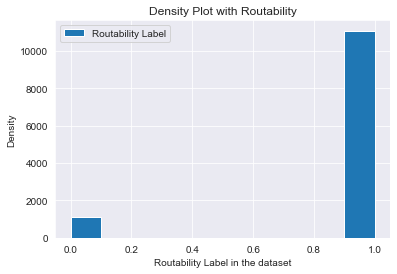

In [11]:
plt.hist(df["Routability Label"])
plt.legend(['Routability Label'])
plt.title('Density Plot with Routability')
plt.xlabel('Routability Label in the dataset')
plt.ylabel('Density')
plt.show()


# Plot the histogram of the data regarding target feature "Routability Label" 
# to show its frequencey distributions

C:\Users\maghs\.conda\envs\nena\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Routability Label', ylabel='Density'>

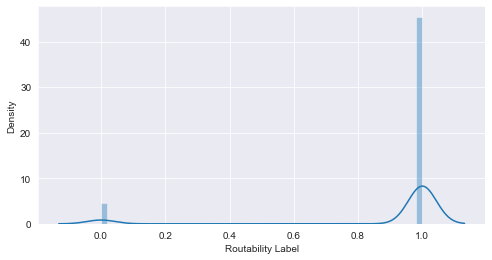

In [12]:
plt.figure(figsize=(8,4))
plt.tight_layout()
sns.distplot(df["Routability Label"])


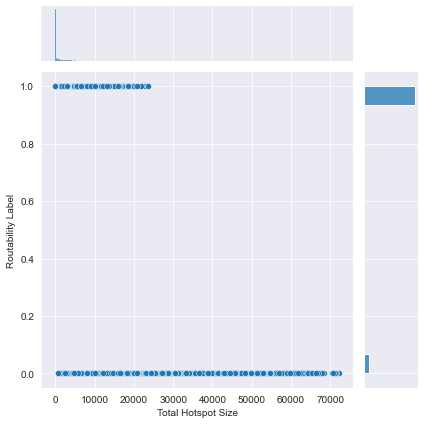

In [13]:
sns.jointplot(data=df, x='Total Hotspot Size', y = "Routability Label")
# scatter between Total Hotspot Size and Routability 
# as it is shown most of the data have the total hotspot size in range of 0 to 10000, 
# and it is not possible to know if it is routable based on its total hotspot range

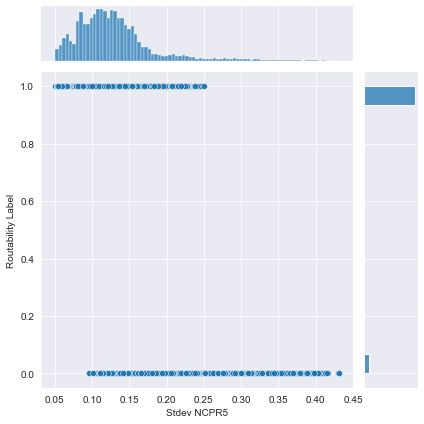

In [14]:
sns.jointplot(data=df, x='Stdev NCPR5', y = "Routability Label")
# scatter between Stdev NCPR5 and "Routability Label" so we can see 
# how the data distributed regarding "Stdev NCPR5" and "Routability Label"

### (f) Check if the dataset is balanced or not.


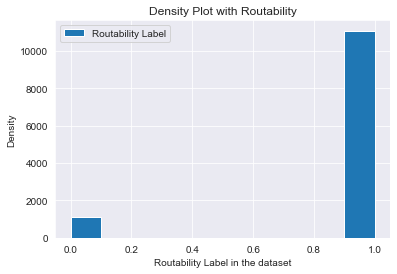

In [15]:
plt.hist(df["Routability Label"])
plt.legend(['Routability Label'])
plt.title('Density Plot with Routability')
plt.xlabel('Routability Label in the dataset')
plt.ylabel('Density')
plt.show()

# As we plotted the histogram, most of records are routable, so the data is imbalanced 

## 3. Perform initial cleaning of the data:
### (a) Delete columns which mainly contain Null values.

In [16]:
df.shape

(12199, 48)

In [17]:
df = df.dropna(how='all', axis=1)
# Drop the column (features) whose values are null for all the records (instances)
df.shape

# There is no such a column

(12199, 48)

In [18]:

# Now we keep the columns that 28% of them are not null
threshold = len(df) * .28
df.dropna(thresh = threshold, axis = 1, inplace = False).shape
# as the shape does not change after dropna, so there is no such a column

(12199, 48)

### (b) Remove duplicate columns (obvious redundant information).

In [19]:
df.columns
# these are the 48 columns

Index(['Placement', 'Pins 0', 'Pins 25', 'Pins 50', 'Pins 75', 'Pins 100',
       'Mean WLPA', 'Stdev WLPA', 'Mean Pins', 'Stdev Pins', 'Mean NCPR5',
       'Stdev NCPR5', 'Mean NCPR9', 'Stdev NCPR9', 'Cong 0', 'Cong 1',
       'Cong 2', 'Cong 3', 'Cong 4', 'Cong 5', 'Cong 6', 'Cong 7', 'Cong 8',
       'Cong 9', 'Cong 10', 'Mean Cong', 'Max Cong', 'Std Cong', 'Top 5% Cong',
       'Utilization', 'HPWL', '#Hotspots', 'Largest Hotspot Size',
       'Max Cong Hotspot Size', 'Total Hotspot Size', 'Largest Hotspot Cong',
       'Max Cong Hotspot Cong', 'Pin Count', 'Cell Count', 'LUT2 Count',
       'LUT3 Count', 'LUT4 Count', 'LUT5 Count', 'LUT6 Count', 'FDRE Count',
       'DSP Count', 'BRAM Count', 'Routability Label'],
      dtype='object')

In [20]:
df.shape

(12199, 48)

In [21]:
# we first drop duplicate rows and then remove redundant columns 
df.drop_duplicates(keep='first', inplace=True)
df.shape
# clearly there were no duplicates as the number of records has not changed

(12199, 48)

In [22]:
# as the number of columns is more than 20 we need to go through all the columns and compare them
# to find the duplicate columns 

duplicatedColumn = set()
# Compare all two columns
for i in range(df.shape[1]):
    firstColumn = df.iloc[:, i]
    for j in range(i + 1, df.shape[1]):
        secondColumn = df.iloc[:, j]

        # Check if two columns are equal using equals method and if yes, add it to our set
        if firstColumn.equals(secondColumn):
            duplicatedColumn.add(df.columns.values[i])
            duplicatedColumn.add(df.columns.values[j])
            

print("Columns which are equal: ", duplicatedColumn)

Columns which are equal:  {'LUT6 Count', 'LUT3 Count'}


In [23]:
# show the columns we found to make sure they are equal

df[['LUT6 Count', 'LUT3 Count']]

,LUT6 Count,LUT3 Count
0,9900,9900
1,96300,96300
2,90000,90000
3,63000,63000
4,45000,45000
...,...,...
12194,90000,90000
12195,45000,45000
12196,91800,91800
12197,18000,18000


In [24]:
df.shape

(12199, 48)

In [25]:
# So we can remove LUT6 Count as it is redundant 
# We also drop Placement beacuse it's not part of features it's name and unique
df.drop(['LUT6 Count', 'Placement'], axis=1, inplace=True)
df.shape

(12199, 46)

In [26]:
df.columns
# clearly the mentioned column is removed.

Index(['Pins 0', 'Pins 25', 'Pins 50', 'Pins 75', 'Pins 100', 'Mean WLPA',
       'Stdev WLPA', 'Mean Pins', 'Stdev Pins', 'Mean NCPR5', 'Stdev NCPR5',
       'Mean NCPR9', 'Stdev NCPR9', 'Cong 0', 'Cong 1', 'Cong 2', 'Cong 3',
       'Cong 4', 'Cong 5', 'Cong 6', 'Cong 7', 'Cong 8', 'Cong 9', 'Cong 10',
       'Mean Cong', 'Max Cong', 'Std Cong', 'Top 5% Cong', 'Utilization',
       'HPWL', '#Hotspots', 'Largest Hotspot Size', 'Max Cong Hotspot Size',
       'Total Hotspot Size', 'Largest Hotspot Cong', 'Max Cong Hotspot Cong',
       'Pin Count', 'Cell Count', 'LUT2 Count', 'LUT3 Count', 'LUT4 Count',
       'LUT5 Count', 'FDRE Count', 'DSP Count', 'BRAM Count',
       'Routability Label'],
      dtype='object')

### (c) Fill missing values in numeric columns if necessary

In [27]:
# df.isnull().sum()
df.isnull().values.any()

False

As we can see there are no missing values.

### (d) Display the number of rows and columns of the data after cleaning.

In [28]:
df.shape
# there are 12199 instances (rows) and 47 columns (features)

(12199, 46)

### (e) Display the features left after cleaning.

In [29]:
df.columns
# list of features

Index(['Pins 0', 'Pins 25', 'Pins 50', 'Pins 75', 'Pins 100', 'Mean WLPA',
       'Stdev WLPA', 'Mean Pins', 'Stdev Pins', 'Mean NCPR5', 'Stdev NCPR5',
       'Mean NCPR9', 'Stdev NCPR9', 'Cong 0', 'Cong 1', 'Cong 2', 'Cong 3',
       'Cong 4', 'Cong 5', 'Cong 6', 'Cong 7', 'Cong 8', 'Cong 9', 'Cong 10',
       'Mean Cong', 'Max Cong', 'Std Cong', 'Top 5% Cong', 'Utilization',
       'HPWL', '#Hotspots', 'Largest Hotspot Size', 'Max Cong Hotspot Size',
       'Total Hotspot Size', 'Largest Hotspot Cong', 'Max Cong Hotspot Cong',
       'Pin Count', 'Cell Count', 'LUT2 Count', 'LUT3 Count', 'LUT4 Count',
       'LUT5 Count', 'FDRE Count', 'DSP Count', 'BRAM Count',
       'Routability Label'],
      dtype='object')

### (f) Plot the distribution (histogram) of some features.

C:\Users\maghs\.conda\envs\nena\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maghs\.conda\envs\nena\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maghs\.conda\envs\nena\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

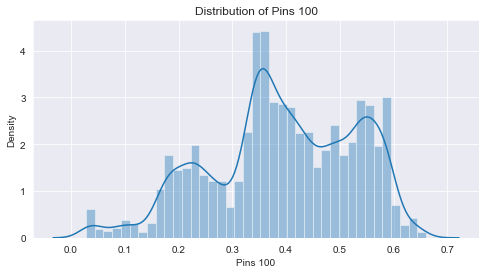

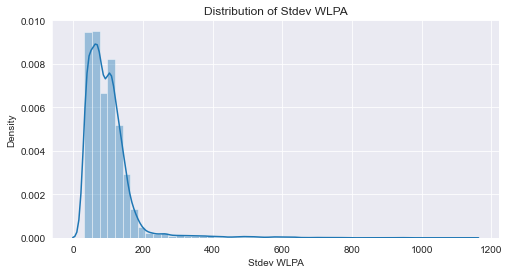

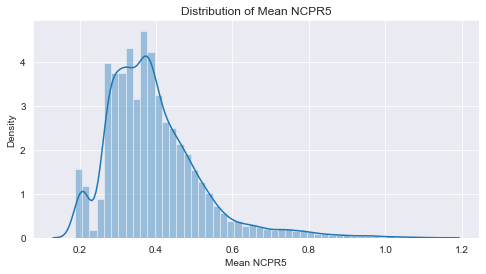

In [30]:
# Plot the distribution for some of the columns 
# we select the position of each column in our for loop 
#  here for example we plot it for columns 4 and 6 and 9 whose names are printed out after plotting
for i in [4, 6, 9]:
    plt.figure(figsize=(8,4))
    plt.tight_layout()
    sns.distplot(df.iloc[:, i]).set(title=f'Distribution of {df.iloc[:, i].name}')

## 4. Analyze the pair-wise relationship between the features of the Data set.


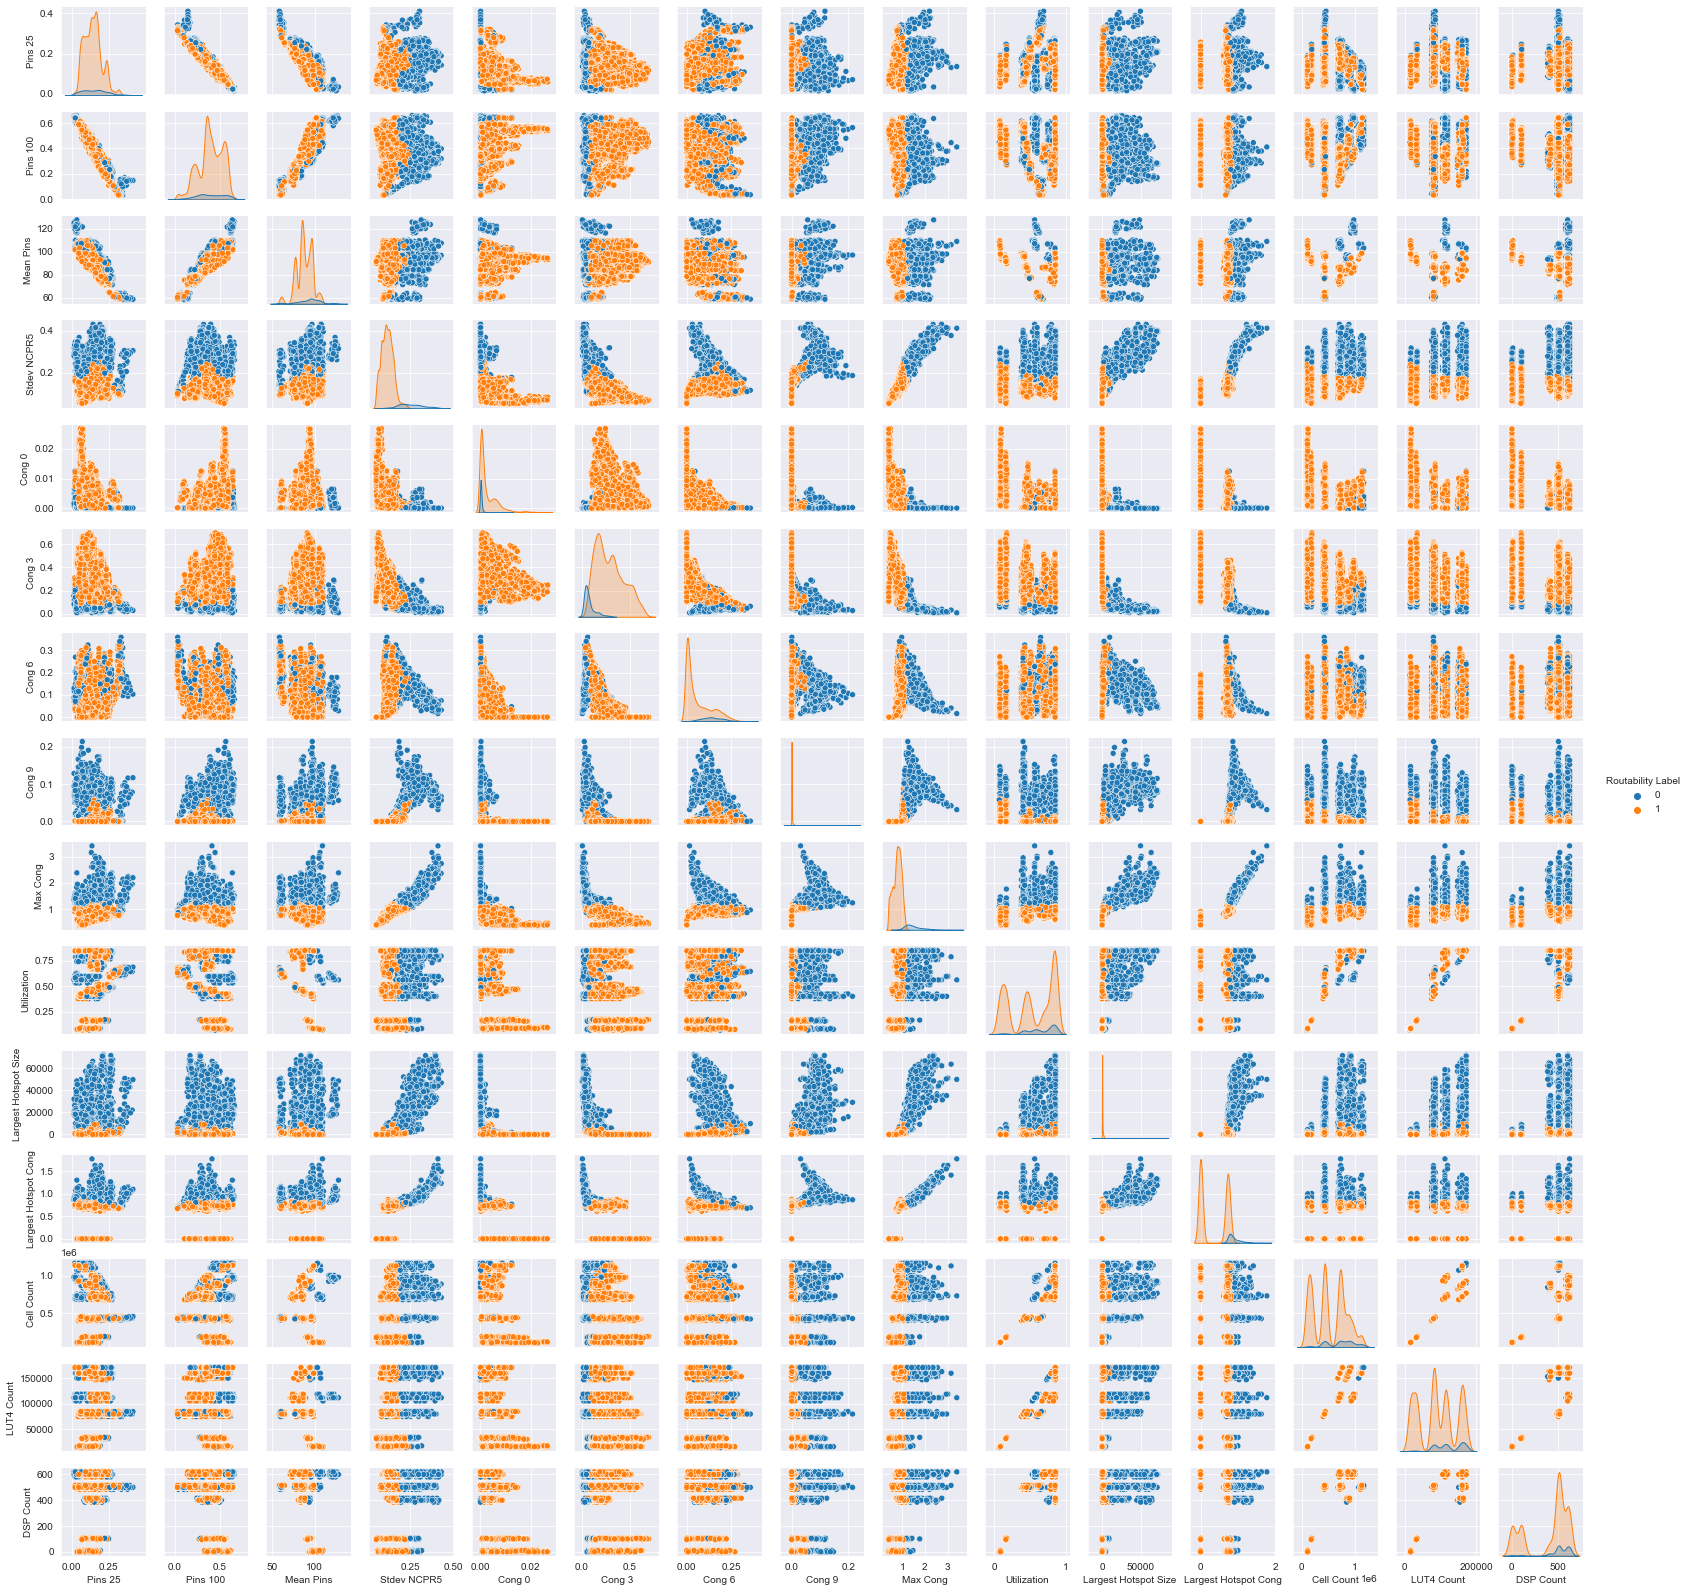

In [31]:
# It visualizes the pair-wise relationships between the different features 
# so we can have a good overview of each data feature's distributions and relationships between the features. 
# We can also have a quick overview of how features correlate.
# For instance, we can see a high negative correlation between Mean Cong and Cong 2 as well as
# NCPRS and Cong 2 by looking at their pairwaise plot below.

# Note that because there are many features it takes for ever to plot the pairwise relationship so we 
# plot it selecting slice from the first column by every 3rd column

# There is a good correlation between 'Mean NCPR5' and 'Mean Cong' as it is demonstrated below

# sns.pairplot(df.iloc[:, -10:].sample(1000), hue='Routability Label', height=1.5);
sns.pairplot(df, vars = df.columns[1::3], hue='Routability Label', height=1.5);

In [32]:
df.columns[1:]

Index(['Pins 25', 'Pins 50', 'Pins 75', 'Pins 100', 'Mean WLPA', 'Stdev WLPA',
       'Mean Pins', 'Stdev Pins', 'Mean NCPR5', 'Stdev NCPR5', 'Mean NCPR9',
       'Stdev NCPR9', 'Cong 0', 'Cong 1', 'Cong 2', 'Cong 3', 'Cong 4',
       'Cong 5', 'Cong 6', 'Cong 7', 'Cong 8', 'Cong 9', 'Cong 10',
       'Mean Cong', 'Max Cong', 'Std Cong', 'Top 5% Cong', 'Utilization',
       'HPWL', '#Hotspots', 'Largest Hotspot Size', 'Max Cong Hotspot Size',
       'Total Hotspot Size', 'Largest Hotspot Cong', 'Max Cong Hotspot Cong',
       'Pin Count', 'Cell Count', 'LUT2 Count', 'LUT3 Count', 'LUT4 Count',
       'LUT5 Count', 'FDRE Count', 'DSP Count', 'BRAM Count',
       'Routability Label'],
      dtype='object')

## 5. Plot the correlation heatmap from the pairwise plots.

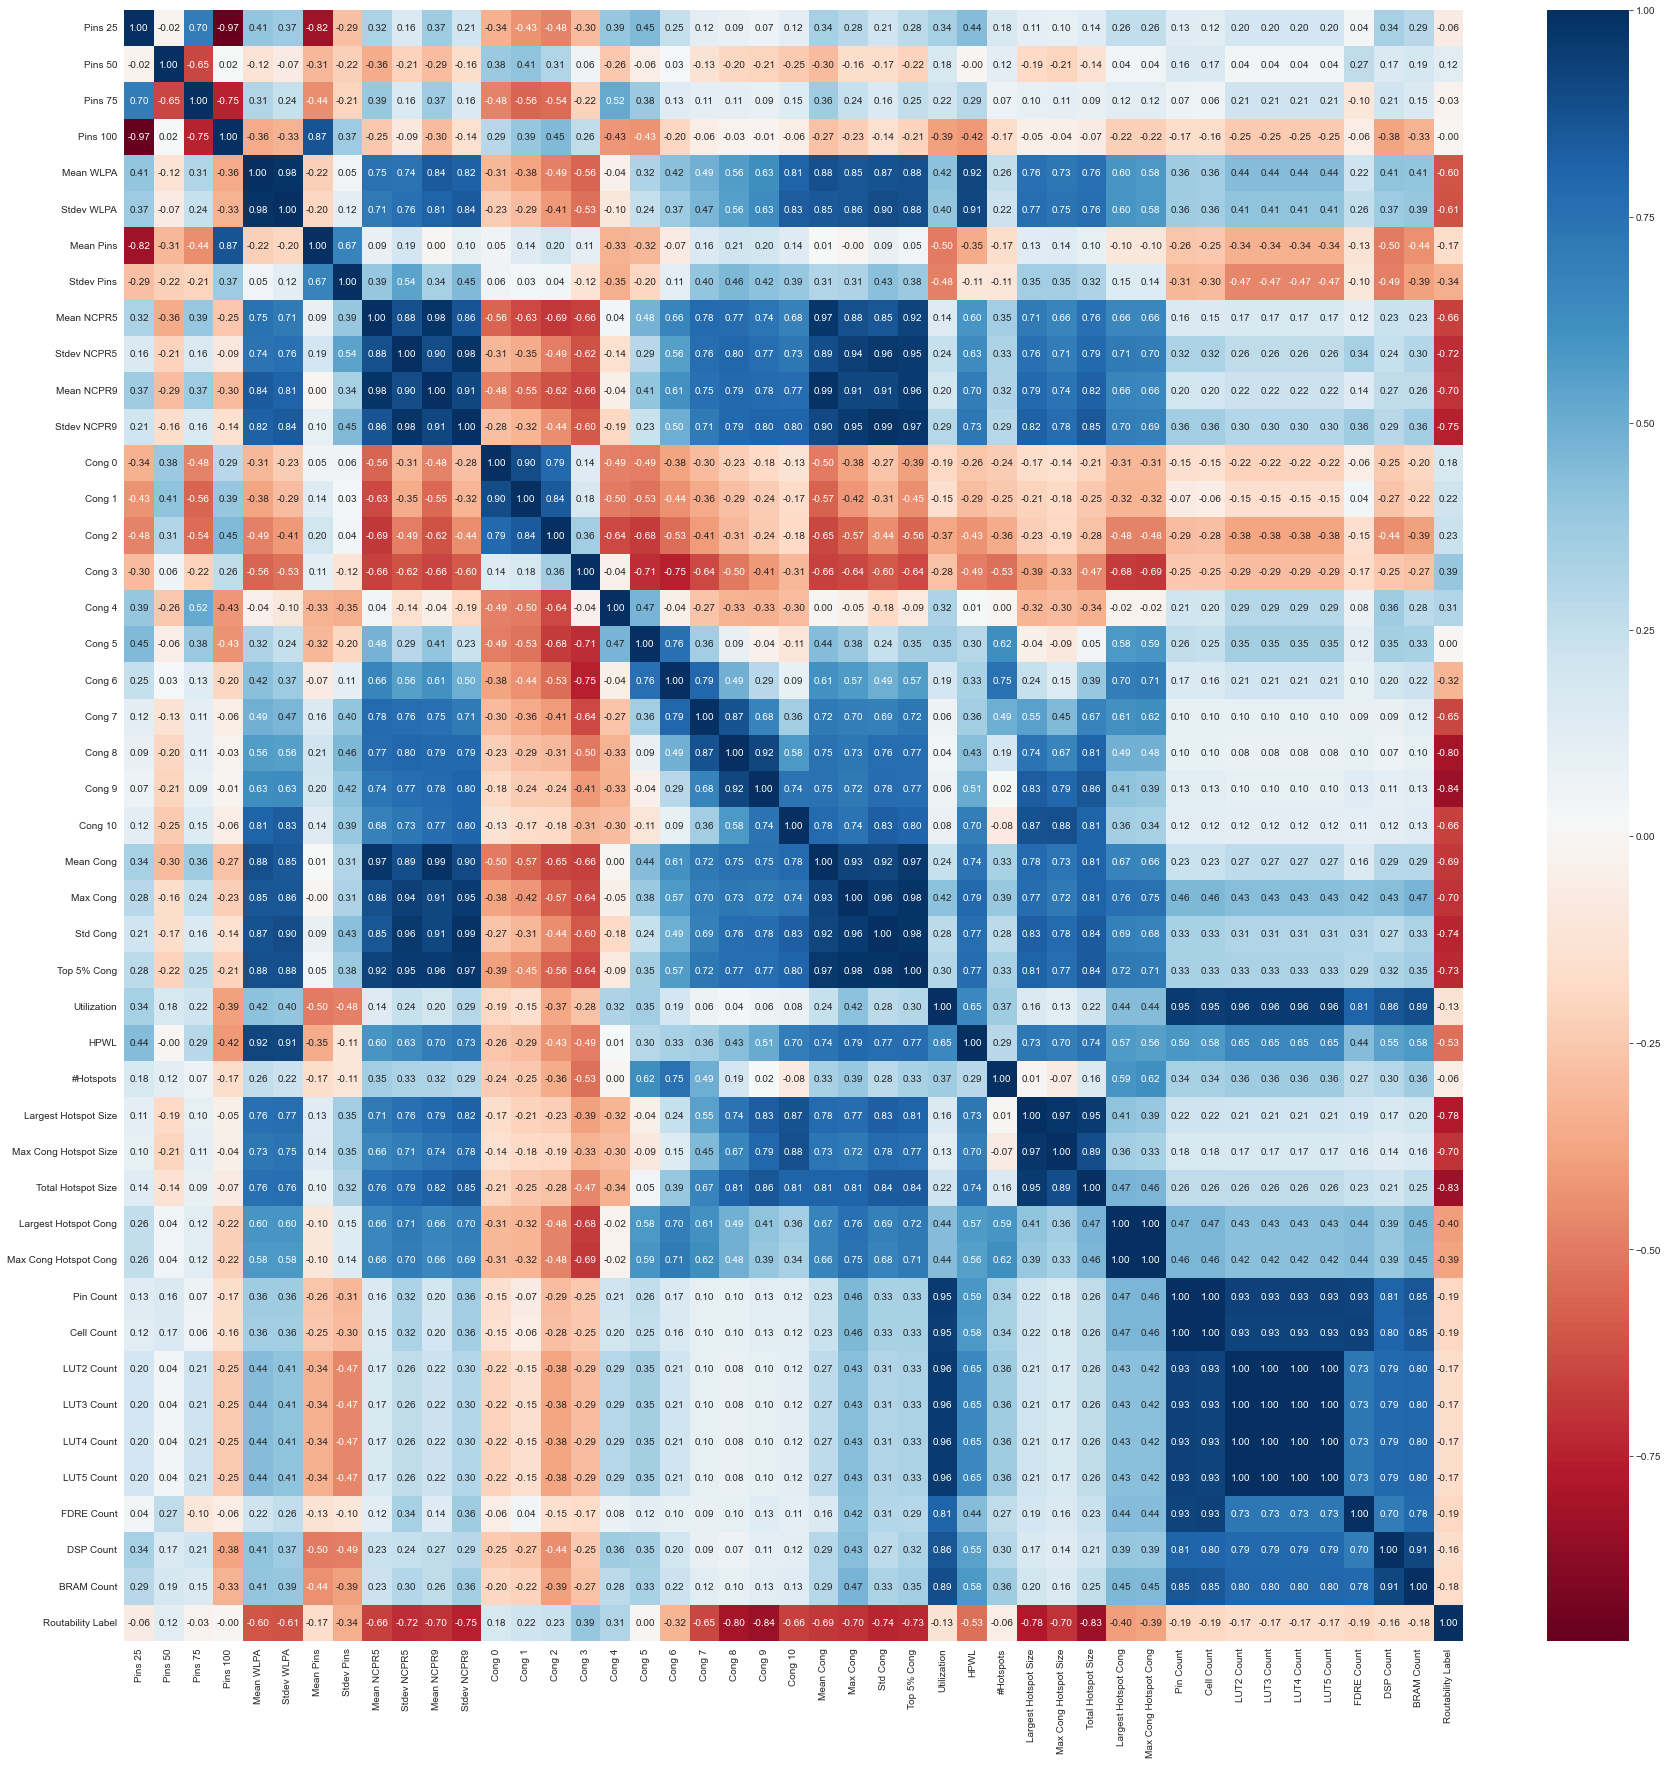

In [33]:
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(df.iloc[:, 1:].corr(), cmap='RdBu', annot=True, fmt=".2f");
# As we can see Total Hotspot Cong has a good correlation with Routability 

## 6. Perform necessary Data Preprocessing (Transformation) for final data preparation.
### (a) Scale values in numeric columns to a (0,1) range if needed.
In order to <span style="font-weight: bold;text-decoration: underline;">avoid</span> **<font color='red'>DATA LEAKAGE</font>**, first we split data and then scale them  
So we do this section after (c) spliting the data
### (b) Encode categorical data into one-hot vectors.

As we can see none of the features is categorical. So just in case to show how to encode, we have encoding code of placement name (although it's not a feature!) as comment here.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

In [35]:
# Encode Placement 

# labelEnc = LabelEncoder()
# newPlacement = labelEnc.fit_transform(np.array(df.Placement))
# encoder1hot = OneHotEncoder()
# encoder1hot.fit(newPlacement.reshape(-1, 1))

# PlacementOneHotEncoded = encoder1hot.transform(newPlacement.reshape(-1,1))
# PlacementOneHotEncoded.shape

In [36]:
# PlacementOneHotEncoded.toarray()

### (c) Split the dataset into training, validation and testing.

In [37]:
df.columns

Index(['Pins 0', 'Pins 25', 'Pins 50', 'Pins 75', 'Pins 100', 'Mean WLPA',
       'Stdev WLPA', 'Mean Pins', 'Stdev Pins', 'Mean NCPR5', 'Stdev NCPR5',
       'Mean NCPR9', 'Stdev NCPR9', 'Cong 0', 'Cong 1', 'Cong 2', 'Cong 3',
       'Cong 4', 'Cong 5', 'Cong 6', 'Cong 7', 'Cong 8', 'Cong 9', 'Cong 10',
       'Mean Cong', 'Max Cong', 'Std Cong', 'Top 5% Cong', 'Utilization',
       'HPWL', '#Hotspots', 'Largest Hotspot Size', 'Max Cong Hotspot Size',
       'Total Hotspot Size', 'Largest Hotspot Cong', 'Max Cong Hotspot Cong',
       'Pin Count', 'Cell Count', 'LUT2 Count', 'LUT3 Count', 'LUT4 Count',
       'LUT5 Count', 'FDRE Count', 'DSP Count', 'BRAM Count',
       'Routability Label'],
      dtype='object')

In [38]:


# Dropping the label column 
X = df.drop(columns=['Routability Label']).copy()
y = df['Routability Label']

# Splitting the data into two section namely train and test
X_train, X_remaining, y_train, y_remaining = train_test_split(X,y, train_size=0.7, random_state=43)

# Then we split the remaining data into two equal parts as test set and validation set
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=43)

In [39]:

# To avoid data leakage we scale after splitting 
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

In [40]:
# just to know the columns number so we can use in the next step
X.columns.get_loc('Total Hotspot Size')
X.columns.get_loc('Cong 9')

22

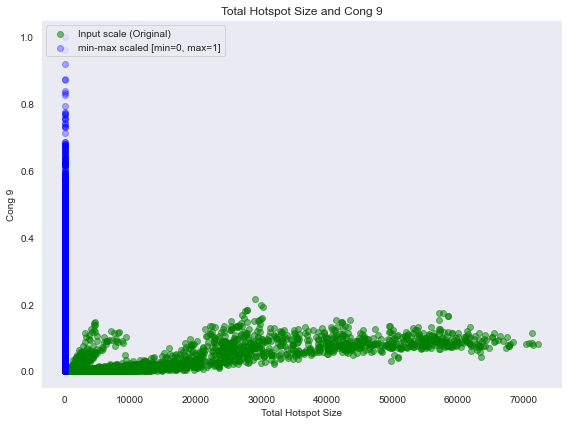

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(df['Total Hotspot Size'], df['Cong 9'], color='green', label='Input scale (Original)', alpha=0.5)
plt.scatter(X_train_minmax[:,33], X_train_minmax[:,22],
color='blue', label='min-max scaled [min=0, max=1]',
alpha=0.3)
plt.title('Total Hotspot Size and Cong 9') 
plt.xlabel('Total Hotspot Size')
plt.ylabel('Cong 9')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# this is to show how the data look like after scaling, as it is shown in the plot
# the scale of the features has become in the range of 0 to 1

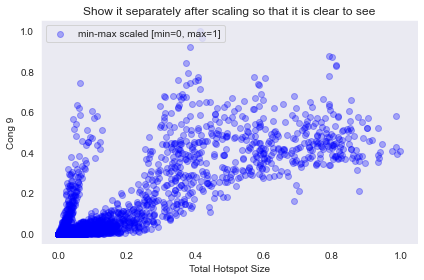

In [42]:
plt.scatter(X_train_minmax[:,33], X_train_minmax[:,22],
color='blue', label='min-max scaled [min=0, max=1]',
alpha=0.3)
plt.title('Show it separately after scaling so that it is clear to see') 
plt.xlabel('Total Hotspot Size')
plt.ylabel('Cong 9')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

## 7. Choose the following Classification Models from Scikit Learn:
- (a) Logistic Regression (LR).
- (b) K-Nearest Neighbors (KNN).
- (c) Naive Bayes (NB).
- (d) Decision Trees (DT).
- (e) Support Vector Machine (SVM).

_______________________
## 8. Use all features in the dataset and calculate the metrics below to compare the performance of the models:

- (a) Accuracy.
- (b) Sensitivity (Recall).
- (c) Specificity.
- (d) Precision.
- (e) F1-Measure.
- (f) ROC/AUC Curves.

Accuracy = (TP+TN)/(TP+FP+FN+TN)

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

Specificity = TN/(TN+FP)

## 7. 
### (a) Logistic Regression (LR)




In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (roc_curve, roc_auc_score, r2_score, f1_score,
                             precision_recall_curve, auc, recall_score, 
                             classification_report, confusion_matrix,
                             precision_recall_fscore_support)


In [44]:

# Evaluation as a func to print every thing needed in a good way 

def my_evaluation(X_test, y_test):
    result_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    result_probs = result_probs[:, 1]
    # predict class values
    result_predict = model.predict(X_test)
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, result_probs)
    lr_f1  = f1_score(y_test, result_predict)
    lr_auc = auc(lr_recall, lr_precision)
    # summarize scores
    printmd("#### precision-recall pairs:")
    print('Compute precision-recall pairs according to sikitlearn docs\n')
    print('Logistic Regression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    # plot the precision-recall curves

    plt.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

    printmd("#### <span style='color:green'>ROC/AUC curve</span>")

    fpr1, tpr1, thresh1 = roc_curve(y_test, result_probs, pos_label=1)
    plt.plot(fpr1, tpr1, linestyle='--',color='green', label='Logistic Regression')
    plt.title('ROC/AUC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.show();


    printmd("#### <span style='color:green'>Accuracy - Precision - Recall</span>")
    # Show the report of precision and recall regarding each class
    print(classification_report(y_test, result_predict))


    printmd("#### <span style='color:green'>Confusion Matrix</span>")
    # Show the TruePositive, FalsePositive, FalseNegative, TruePositive as tn, fp, fn, and tp respectively 
    tn, fp, fn, tp = confusion_matrix(y_test, result_predict).ravel()
    print(f'TruePositive: {tn}, FalsePositive: {fp}, FalseNegative: {fp}, TruePositive:{tp}')


    printmd("#### <span style='color:green'>Calculate Specificity, Precision Recall and F1 manually</span>")
    # Calculate precision manually
    precision_manual = tp/(tp+fp)
    print(f'Calculate Precision manually: {precision_manual}')
    # Calculate recall manually
    recall_manual = tp/(tp+fn)
    print(f'Calculate Recall manually: {recall_manual}')
    # Calculate F1 measure manually
    print(f'Calculate F1-Score manually: {2 *(precision_manual*recall_manual/(precision_manual+recall_manual))}')
    print(f'\nSpecificity: {tn/(tn+fp)}')

#### precision-recall pairs:

Compute precision-recall pairs according to sikitlearn docs

Logistic Regression: f1=0.993 auc=0.999


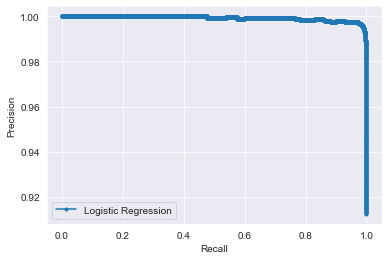

#### <span style='color:green'>ROC/AUC curve</span>

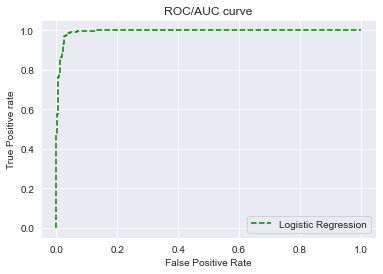

#### <span style='color:green'>Accuracy - Precision - Recall</span>

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       320
           1       0.99      1.00      0.99      3340

    accuracy                           0.99      3660
   macro avg       0.98      0.94      0.96      3660
weighted avg       0.99      0.99      0.99      3660



#### <span style='color:green'>Confusion Matrix</span>

TruePositive: 285, FalsePositive: 35, FalseNegative: 35, TruePositive:3330


#### <span style='color:green'>Calculate Specificity, Precision Recall and F1 manually</span>

Calculate Precision manually: 0.9895988112927192
Calculate Recall manually: 0.9970059880239521
Calculate F1-Score manually: 0.9932885906040269

Specificity: 0.890625


In [45]:


#reshape to convert from 1D array to 2D array 
# as there were some errors because of the dimension 
X = df.drop(columns=['Routability Label']).copy()
y = df['Routability Label']

# Splitting the data into two section namely train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=43)


# min_max_scaler = MinMaxScaler()
# X_train = min_max_scaler.fit_transform(X_train)
# X_test = min_max_scaler.transform(X_test)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Evaluation using my method
my_evaluation(X_test, y_test)

### (b) K-Nearest Neighbors (KNN).

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
#reshape to convert from 1D array to 2D array 
# as there were some errors because of the dimension 
X = df.drop(columns=['Routability Label']).copy()
y = df['Routability Label']


printmd("### (b) K-Nearest Neighbors (KNN):")

# Splitting the data into two section namely train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=43)


### (b) K-Nearest Neighbors (KNN):

### (b) K-Nearest Neighbors (KNN):

#### precision-recall pairs:

Compute precision-recall pairs according to sikitlearn docs

Logistic Regression: f1=0.997 auc=0.999


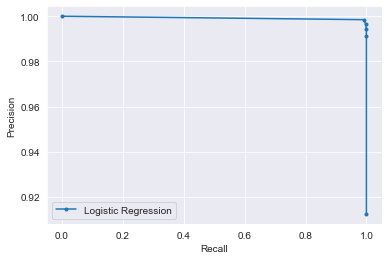

#### <span style='color:green'>ROC/AUC curve</span>

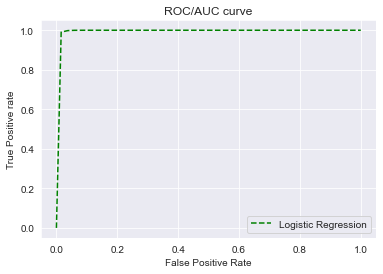

#### <span style='color:green'>Accuracy - Precision - Recall</span>

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       320
           1       1.00      1.00      1.00      3340

    accuracy                           1.00      3660
   macro avg       0.99      0.98      0.98      3660
weighted avg       1.00      1.00      1.00      3660



#### <span style='color:green'>Confusion Matrix</span>

TruePositive: 308, FalsePositive: 12, FalseNegative: 12, TruePositive:3334


#### <span style='color:green'>Calculate Specificity, Precision Recall and F1 manually</span>

Calculate Precision manually: 0.9964136282127914
Calculate Recall manually: 0.9982035928143712
Calculate F1-Score manually: 0.99730780735866

Specificity: 0.9625


In [49]:
#reshape to convert from 1D array to 2D array 
# as there were some errors because of the dimension 
X = df.drop(columns=['Routability Label']).copy()
y = df['Routability Label']


printmd("### (b) K-Nearest Neighbors (KNN):")

# Splitting the data into two section namely train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=43)

min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)

# Evaluation using my method
my_evaluation(X_test, y_test)

### (c) Naive Bayes (NB).

In [50]:
from sklearn.naive_bayes import GaussianNB

### (c) Naive Bayes (NB):

#### precision-recall pairs:

Compute precision-recall pairs according to sikitlearn docs

Logistic Regression: f1=0.980 auc=0.999


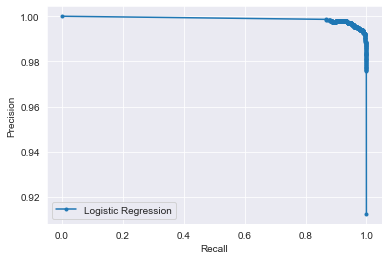

#### <span style='color:green'>ROC/AUC curve</span>

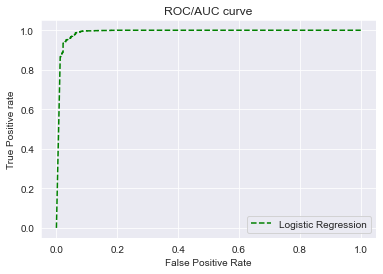

#### <span style='color:green'>Accuracy - Precision - Recall</span>

              precision    recall  f1-score   support

           0       0.72      0.95      0.82       320
           1       1.00      0.97      0.98      3340

    accuracy                           0.96      3660
   macro avg       0.86      0.96      0.90      3660
weighted avg       0.97      0.96      0.97      3660



#### <span style='color:green'>Confusion Matrix</span>

TruePositive: 305, FalsePositive: 15, FalseNegative: 15, TruePositive:3224


#### <span style='color:green'>Calculate Specificity, Precision Recall and F1 manually</span>

Calculate Precision manually: 0.9953689410311825
Calculate Recall manually: 0.9652694610778443
Calculate F1-Score manually: 0.9800881592947256

Specificity: 0.953125


In [51]:
#reshape to convert from 1D array to 2D array 
# as there were some errors because of the dimension 
X = df.drop(columns=['Routability Label']).copy()
y = df['Routability Label']


printmd("### (c) Naive Bayes (NB):")

# Splitting the data into two section namely train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=43)

min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

model = GaussianNB()
model.fit(X_train, y_train)

# Evaluation using my method
my_evaluation(X_test, y_test)

### (d) Decision Tree (DT).

In [52]:
from sklearn.tree import DecisionTreeClassifier

### (d) Decision Tree (DT):

#### precision-recall pairs:

Compute precision-recall pairs according to sikitlearn docs

Logistic Regression: f1=0.995 auc=0.998


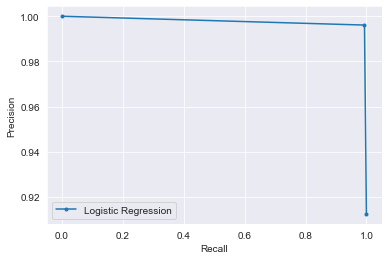

#### <span style='color:green'>ROC/AUC curve</span>

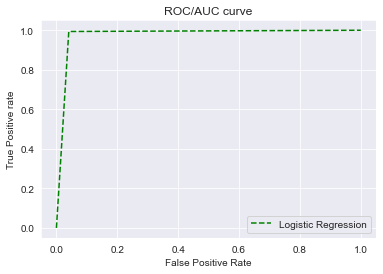

#### <span style='color:green'>Accuracy - Precision - Recall</span>

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       320
           1       1.00      0.99      0.99      3340

    accuracy                           0.99      3660
   macro avg       0.97      0.98      0.97      3660
weighted avg       0.99      0.99      0.99      3660



#### <span style='color:green'>Confusion Matrix</span>

TruePositive: 307, FalsePositive: 13, FalseNegative: 13, TruePositive:3319


#### <span style='color:green'>Calculate Specificity, Precision Recall and F1 manually</span>

Calculate Precision manually: 0.9960984393757503
Calculate Recall manually: 0.9937125748502994
Calculate F1-Score manually: 0.9949040767386091

Specificity: 0.959375


In [53]:
#reshape to convert from 1D array to 2D array 
# as there were some errors because of the dimension 
X = df.drop(columns=['Routability Label']).copy()
y = df['Routability Label']


printmd("### (d) Decision Tree (DT):")

# Splitting the data into two section namely train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=43)

min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluation using my method
my_evaluation(X_test, y_test)

### (e) Support Vector Machine (SVM).

In [54]:
from sklearn import svm

### (e) Support Vector Machine (SVM): (WITHOUT Scaling)

#### precision-recall pairs:

Compute precision-recall pairs according to sikitlearn docs

Logistic Regression: f1=0.972 auc=0.974


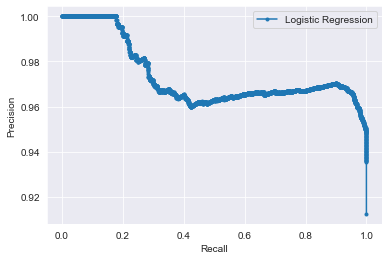

#### <span style='color:green'>ROC/AUC curve</span>

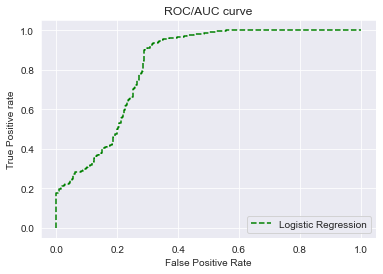

#### <span style='color:green'>Accuracy - Precision - Recall</span>

              precision    recall  f1-score   support

           0       1.00      0.41      0.58       320
           1       0.95      1.00      0.97      3340

    accuracy                           0.95      3660
   macro avg       0.97      0.70      0.78      3660
weighted avg       0.95      0.95      0.94      3660



#### <span style='color:green'>Confusion Matrix</span>

TruePositive: 131, FalsePositive: 189, FalseNegative: 189, TruePositive:3340


#### <span style='color:green'>Calculate Specificity, Precision Recall and F1 manually</span>

Calculate Precision manually: 0.94644375177104
Calculate Recall manually: 1.0
Calculate F1-Score manually: 0.9724850778861552

Specificity: 0.409375


In [55]:
#reshape to convert from 1D array to 2D array 
# as there were some errors because of the dimension 
X = df.drop(columns=['Routability Label']).copy()
y = df['Routability Label']


printmd("### (e) Support Vector Machine (SVM): (WITHOUT Scaling)")

# Splitting the data into two section namely train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=43)

# min_max_scaler = MinMaxScaler()
# X_train = min_max_scaler.fit_transform(X_train)
# X_test = min_max_scaler.transform(X_test)

model = svm.SVC(probability=True)
model.fit(X_train, y_train)

# Evaluation using my method
my_evaluation(X_test, y_test)

### (e) Support Vector Machine (SVM): (AFTER Scaling)

#### precision-recall pairs:

Compute precision-recall pairs according to sikitlearn docs

Logistic Regression: f1=0.997 auc=1.000


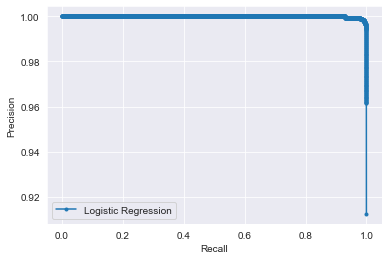

#### <span style='color:green'>ROC/AUC curve</span>

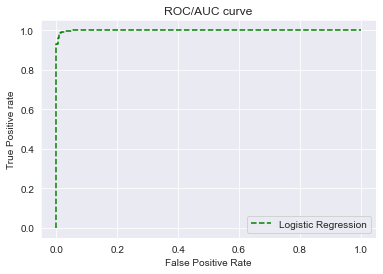

#### <span style='color:green'>Accuracy - Precision - Recall</span>

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       320
           1       0.99      1.00      1.00      3340

    accuracy                           0.99      3660
   macro avg       1.00      0.97      0.98      3660
weighted avg       0.99      0.99      0.99      3660



#### <span style='color:green'>Confusion Matrix</span>

TruePositive: 298, FalsePositive: 22, FalseNegative: 22, TruePositive:3340


#### <span style='color:green'>Calculate Specificity, Precision Recall and F1 manually</span>

Calculate Precision manually: 0.9934562760261749
Calculate Recall manually: 1.0
Calculate F1-Score manually: 0.996717397791704

Specificity: 0.93125


In [56]:
#reshape to convert from 1D array to 2D array 
# as there were some errors because of the dimension 
X = df.drop(columns=['Routability Label']).copy()
y = df['Routability Label']


printmd("### (e) Support Vector Machine (SVM): (AFTER Scaling)")

# Splitting the data into two section namely train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=43)

min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

model = svm.SVC(probability=True)
model.fit(X_train, y_train)

# Evaluation using my method
my_evaluation(X_test, y_test)

## 9. Perform Hyper-parameter Tuning on the models and again compare the different models.


#### This part is addressed at the end of the notebook as it needs repeated actions and takes space


## 10. Perform Feature Selection (use filter based and wrapper based methods) and choose only Support Vector Machines to classify the dataset.

### Filter based

Features with high correlation with eachother: 'Mean NCPR5', 'Stdev NCPR5', 'Mean NCPR9','Stdev NCPR9'
These features have high correlation with eachother so we only select one of them

*'Stdev NCPR9'* has the most correlation with the target class so we chose it.


These features below also have high correlation with eachother however we only choose *'Total Hotspot Size'* as it has high correlation with target and other classes

'Cong 0', 'Cong 1', 'Cong 2', 'Cong 3', 'Cong 4',
       'Cong 5', 'Cong 6', 'Cong 7', 'Cong 8', 'Cong 9', 'Cong 10', 'Total Hotspot Size'


### 1.1 - Feature selection based on filtering (finding correlation):

#### precision-recall pairs:

Compute precision-recall pairs according to sikitlearn docs

Logistic Regression: f1=0.990 auc=0.968


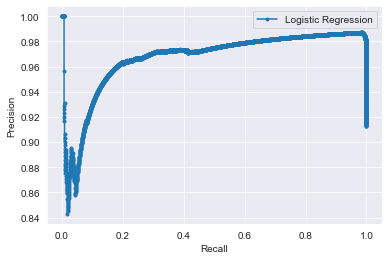

#### <span style='color:green'>ROC/AUC curve</span>

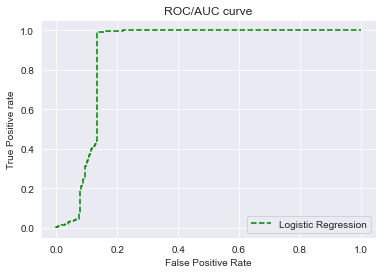

#### <span style='color:green'>Accuracy - Precision - Recall</span>

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       320
           1       0.98      1.00      0.99      3340

    accuracy                           0.98      3660
   macro avg       0.98      0.90      0.93      3660
weighted avg       0.98      0.98      0.98      3660



#### <span style='color:green'>Confusion Matrix</span>

TruePositive: 256, FalsePositive: 64, FalseNegative: 64, TruePositive:3334


#### <span style='color:green'>Calculate Specificity, Precision Recall and F1 manually</span>

Calculate Precision manually: 0.9811653914067098
Calculate Recall manually: 0.9982035928143712
Calculate F1-Score manually: 0.9896111605817749

Specificity: 0.8


In [57]:
#reshape to convert from 1D array to 2D array 
# as there were some errors because of the dimension 
X = df.drop(columns=['Routability Label']).copy()[['Total Hotspot Size','Stdev NCPR9']]
y = df['Routability Label']


printmd("### 1.1 - Feature selection based on filtering (finding correlation):")

# Splitting the data into two section namely train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=43)


model = svm.SVC(probability=True)
model.fit(X_train, y_train)

# Evaluation using my method
my_evaluation(X_test, y_test)

In [59]:
# We also can use SelectKBest to give score to each feature 

from sklearn.feature_selection import SelectKBest, chi2

X = df.drop(columns=['Routability Label']).copy()
y = df['Routability Label']


X_new = SelectKBest(chi2, k=5).fit_transform(X, y)
print("New shape of the data: " , X_new.shape)

New shape of the data:  (12199, 5)


### 1.2 - Feature selection based on filtering (SelectKBest):

#### precision-recall pairs:

Compute precision-recall pairs according to sikitlearn docs

Logistic Regression: f1=0.994 auc=1.000


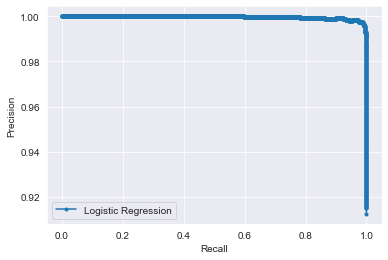

#### <span style='color:green'>ROC/AUC curve</span>

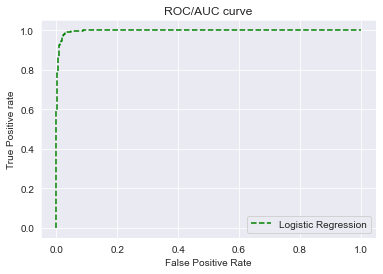

#### <span style='color:green'>Accuracy - Precision - Recall</span>

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       320
           1       0.99      1.00      0.99      3340

    accuracy                           0.99      3660
   macro avg       0.99      0.94      0.96      3660
weighted avg       0.99      0.99      0.99      3660



#### <span style='color:green'>Confusion Matrix</span>

TruePositive: 282, FalsePositive: 38, FalseNegative: 38, TruePositive:3337


#### <span style='color:green'>Calculate Specificity, Precision Recall and F1 manually</span>

Calculate Precision manually: 0.9887407407407407
Calculate Recall manually: 0.9991017964071857
Calculate F1-Score manually: 0.9938942665673864

Specificity: 0.88125


In [60]:
#reshape to convert from 1D array to 2D array 
# as there were some errors because of the dimension 
# X = df.drop(columns=['Routability Label']).copy()[['Total Hotspot Size','Stdev NCPR9']]
# y = df['Routability Label']


printmd("### 1.2 - Feature selection based on filtering (SelectKBest):")

# Splitting the data into two section namely train and test
X_train, X_test, y_train, y_test = train_test_split(X_new,y, train_size=0.7, random_state=43)


min_max_scaler = MinMaxScaler()
min_max_scaler = min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)


model = svm.SVC(probability=True)

model.fit(X_train, y_train)

# Evaluation using my method
my_evaluation(X_test, y_test)

#### It shows that based on only two features it can have a high accuracy and F1 

### Wrapper based 

As it takes for ever to find the best features, we give the function 4 features and it returns the selected features

In [61]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.feature_selection import SequentialFeatureSelector

In [62]:

#reshape to convert from 1D array to 2D array 
# as there were some errors because of the dimension 
X = df.drop(columns=['Routability Label']).copy()[['Total Hotspot Size','Stdev NCPR9', 'Cong 6', 'Cong 7']]
y = df['Routability Label']


printmd("### 2 - Feature selection based on Wrapper:")

# Splitting the data into two section namely train and test
# X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=43)


# min_max_scaler = MinMaxScaler()
# X_train = min_max_scaler.fit_transform(X_train)
# X_test = min_max_scaler.transform(X_test)

model = svm.SVC(probability=True)
sfs = SequentialFeatureSelector(model, n_features_to_select=3)
sfs.fit(X, y)


### 2 - Feature selection based on Wrapper:

SequentialFeatureSelector(estimator=SVC(probability=True),
                          n_features_to_select=3)

In [63]:
sfs.get_support()

array([ True,  True,  True, False])

In [64]:
printmd("#### Selected features:")
X.iloc[:,sfs.get_support()]

#### Selected features:

,Total Hotspot Size,Stdev NCPR9,Cong 6
0,0,0.085106,0.000000
1,5906,0.195138,0.138741
2,0,0.158797,0.033020
3,0,0.146850,0.007708
4,0,0.129885,0.016606
...,...,...,...
12194,2961,0.196981,0.099295
12195,2886,0.170732,0.133543
12196,6441,0.192953,0.165086
12197,0,0.059503,0.000000


### 2 - Feature selection based on Wrapper:

#### precision-recall pairs:

Compute precision-recall pairs according to sikitlearn docs

Logistic Regression: f1=0.990 auc=0.970


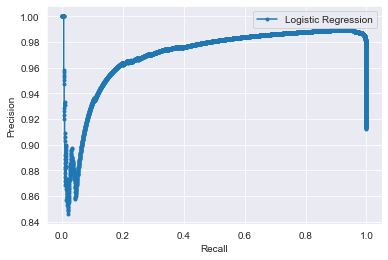

#### <span style='color:green'>ROC/AUC curve</span>

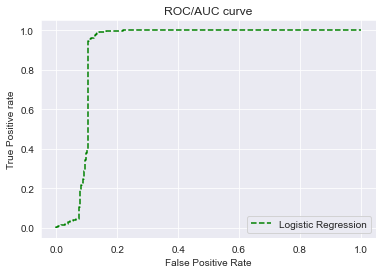

#### <span style='color:green'>Accuracy - Precision - Recall</span>

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       320
           1       0.98      1.00      0.99      3340

    accuracy                           0.98      3660
   macro avg       0.98      0.90      0.93      3660
weighted avg       0.98      0.98      0.98      3660



#### <span style='color:green'>Confusion Matrix</span>

TruePositive: 256, FalsePositive: 64, FalseNegative: 64, TruePositive:3334


#### <span style='color:green'>Calculate Specificity, Precision Recall and F1 manually</span>

Calculate Precision manually: 0.9811653914067098
Calculate Recall manually: 0.9982035928143712
Calculate F1-Score manually: 0.9896111605817749

Specificity: 0.8


In [65]:


#reshape to convert from 1D array to 2D array 
# as there were some errors because of the dimension 
X = X.iloc[:,sfs.get_support()]


printmd("### 2 - Feature selection based on Wrapper:")

# Splitting the data into two section namely train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=43)

model = svm.SVC(probability=True)

# New data which selected features based on the result of wrapped method

model.fit(X_train, y_train)

# Evaluation using my method
my_evaluation(X_test, y_test)


## 11. If the dataset is imbalanced then use SMOTE to balance it. Again, choose only SVM to classify the dataset and report the different metrics mentioned above in step 8.

In [66]:
# it needs imblearn library to be installed

from imblearn.over_sampling import SMOTE

X = df.drop(columns=['Routability Label']).copy()
y = df['Routability Label']


oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

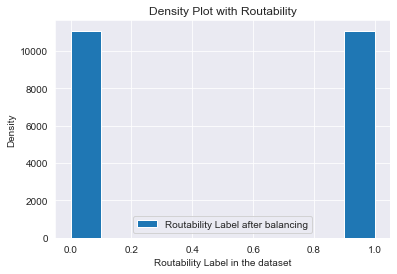

In [67]:
plt.hist(y)
plt.legend(['Routability Label after balancing'])
plt.title('Density Plot with Routability')
plt.xlabel('Routability Label in the dataset')
plt.ylabel('Density')
plt.show()

### (11) SVM: (AFTER Balancing data)

#### precision-recall pairs:

Compute precision-recall pairs according to sikitlearn docs

Logistic Regression: f1=0.990 auc=0.999


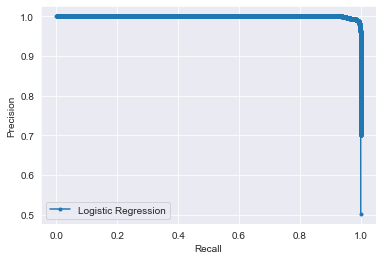

#### <span style='color:green'>ROC/AUC curve</span>

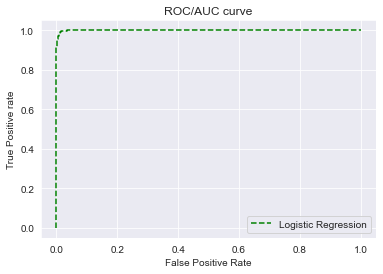

#### <span style='color:green'>Accuracy - Precision - Recall</span>

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3312
           1       0.99      0.99      0.99      3343

    accuracy                           0.99      6655
   macro avg       0.99      0.99      0.99      6655
weighted avg       0.99      0.99      0.99      6655



#### <span style='color:green'>Confusion Matrix</span>

TruePositive: 3265, FalsePositive: 47, FalseNegative: 47, TruePositive:3321


#### <span style='color:green'>Calculate Specificity, Precision Recall and F1 manually</span>

Calculate Precision manually: 0.9860451306413301
Calculate Recall manually: 0.9934190846545019
Calculate F1-Score manually: 0.9897183728207422

Specificity: 0.9858091787439613


In [68]:
#reshape to convert from 1D array to 2D array 
# as there were some errors because of the dimension 
# X = df.drop(columns=['Routability Label']).copy()
# y = df['Routability Label']


printmd("### (11) SVM: (AFTER Balancing data)")

# Splitting the data into two section namely train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=43)

min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

model = svm.SVC(probability=True)
model.fit(X_train, y_train)

# Evaluation using my method
my_evaluation(X_test, y_test)

## 9. Perform Hyper-parameter Tuning on the models and again compare the different models.


In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 


In [ ]:

X = df.drop(columns=['Routability Label']).copy()
y = df['Routability Label']

# Splitting the data into two section namely train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=43)

printmd("### Linear Regression - Hyperparameter tuning:")
steps = [('scaler', MinMaxScaler()), ('LR', LogisticRegression(max_iter=500))]
my_pipeline = Pipeline(steps)

my_pipeline.fit(X_train, y_train)

par_grid = {
     'LR__penalty' : ['l1', 'l2'],
    'LR__C' : np.logspace(-4, 4)}

grid = GridSearchCV(my_pipeline, param_grid=par_grid, cv=5)

grid.fit(X_train, y_train)

In [71]:
print(f"score = {grid.score(X_test,y_test)}")
print('Best Score: %s' % grid.best_score_)
print('Best Hyperparameters: %s' % grid.best_params_)


score = 0.9956284153005465
Best Score: 0.9927389492775992
Best Hyperparameters: {'LR__C': 3237.45754281764, 'LR__penalty': 'l2'}


In [72]:


X = df.drop(columns=['Routability Label']).copy()
y = df['Routability Label']

# Splitting the data into two section namely train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=43)

printmd("### GaussianNB Naive Bayse - Hyperparameter tuning:")

steps = [('scaler', MinMaxScaler()), ('classifier', GaussianNB())]
my_pipeline = Pipeline(steps)

my_pipeline.fit(X_train, y_train)

par_grid = {'classifier__var_smoothing': np.logspace(0,-9, num=100)}

grid = GridSearchCV(my_pipeline, param_grid=par_grid, cv=4)

grid.fit(X_train, y_train)

### GaussianNB Naive Bayse - Hyperparameter tuning:

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classifier', GaussianNB())]),
             param_grid={'classifier__var_smoothing': array([1.000e+00, 8.111e-01, 6.579e-01, 5.337e-01, 4.329e-01, 3.511e-01,
       2.848e-01, 2.310e-01, 1.874e-01, 1.520e-01, 1.233e-01, 1.000e-01,
       8.111e-02, 6.579e-02, 5.337e-02, 4.329e-02, 3.511e-02, 2.848e-02,
       2.310e-02, 1.874e-02, 1.5...
       3.511e-06, 2.848e-06, 2.310e-06, 1.874e-06, 1.520e-06, 1.233e-06,
       1.000e-06, 8.111e-07, 6.579e-07, 5.337e-07, 4.329e-07, 3.511e-07,
       2.848e-07, 2.310e-07, 1.874e-07, 1.520e-07, 1.233e-07, 1.000e-07,
       8.111e-08, 6.579e-08, 5.337e-08, 4.329e-08, 3.511e-08, 2.848e-08,
       2.310e-08, 1.874e-08, 1.520e-08, 1.233e-08, 1.000e-08, 8.111e-09,
       6.579e-09, 5.337e-09, 4.329e-09, 3.511e-09, 2.848e-09, 2.310e-09,
       1.874e-09, 1.520e-09, 1.233e-09, 1.000e-09])})

In [73]:
print(f"score = {grid.score(X_test,y_test)}")
print('Best Score: %s' % grid.best_score_)
print('Best Hyperparameters: %s' % grid.best_params_)


score = 0.987431693989071
Best Score: 0.9840731306888143
Best Hyperparameters: {'classifier__var_smoothing': 0.1}


In [74]:


X = df.drop(columns=['Routability Label']).copy()
y = df['Routability Label']

# Splitting the data into two section namely train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=43)

printmd("### DecisionTreeClassifier - Hyperparameter tuning:")

steps = [('scaler', MinMaxScaler()), ('classifier', DecisionTreeClassifier())]
my_pipeline = Pipeline(steps)

my_pipeline.fit(X_train, y_train)

par_grid = { 'classifier__criterion':['gini','entropy'],'classifier__max_depth': np.arange(3, 15)}

grid = GridSearchCV(my_pipeline, param_grid=par_grid, cv=4)

grid.fit(X_train, y_train)

### DecisionTreeClassifier - Hyperparameter tuning:

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [75]:
print(f"score = {grid.score(X_test,y_test)}")
print('Best Score: %s' % grid.best_score_)
print('Best Hyperparameters: %s' % grid.best_params_)


score = 0.9942622950819672
Best Score: 0.991685469338841
Best Hyperparameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 14}


In [76]:


X = df.drop(columns=['Routability Label']).copy()
y = df['Routability Label']

# Splitting the data into two section namely train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=43)

printmd("### SVM - Hyperparameter tuning:")

steps = [('scaler', MinMaxScaler()), ('classifier', svm.SVC())]
my_pipeline = Pipeline(steps)

my_pipeline.fit(X_train, y_train)

par_grid = {'classifier__C': [0.1, 1],
              'classifier__gamma': [1, 0.1, 0.01],
              'classifier__kernel': ['rbf']}

grid = GridSearchCV(my_pipeline, param_grid=par_grid, cv=4)

grid.fit(X_train, y_train)

### SVM - Hyperparameter tuning:

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.1, 1],
                         'classifier__gamma': [1, 0.1, 0.01],
                         'classifier__kernel': ['rbf']})

In [77]:
print(f"score = {grid.score(X_test,y_test)}")
print('Best Score: %s' % grid.best_score_)
print('Best Hyperparameters: %s' % grid.best_params_)


score = 0.9939890710382514
Best Score: 0.9907482622160668
Best Hyperparameters: {'classifier__C': 1, 'classifier__gamma': 1, 'classifier__kernel': 'rbf'}
